In [11]:
import pandas as pd
import matplotlib as pyplot
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [465]:
#Lectura de base de datos , solamente de pestañas a utilizar

In [13]:
excel_file = 'C:/Users/celem/OneDrive/Escritorio/dataset (9).xlsx'

pestañas_a_leer = ['cuadro 2', 'cuadro 3']

dataframes = {}

for pestaña in pestañas_a_leer:
    df = pd.read_excel(excel_file, sheet_name=pestaña)
    dataframes[pestaña] = df

df_varones = dataframes['cuadro 2']
df_mujeres = dataframes['cuadro 3']

In [14]:
print(df_varones)

   Principales causas de muerte  Defunciones 2005  Defunciones 2006  \
0          Todas las edades (1)               270               244   
1          E.S circulatorio (1)                60                50   
2          Tumores malignos (1)                82                42   
3          E.S respiratorio (1)                19                35   
4           Causas externas (1)                30                46   
5   E. infec y parasitarias (1)                 7                 6   
6         Diabetes Mellitus (1)                 4                 8   
7              E.S urinario (1)                10                 6   
8         período perinatal (1)                 8                 8   
9       Resto de las causas (1)                50                43   
10            De 0 a 4 años (2)                13                19   
11         Tumores malignos (2)                 0                 1   
12         E.S respiratorio (2)                 2                 3   
13    

In [17]:
print(df_mujeres)

   Principales causas de muerte  Defunciones 2005  Defunciones 2006  \
0          Todas las edades (1)               137               161   
1          E.S circulatorio (1)                25                28   
2          Tumores malignos (1)                42                36   
3          E.S respiratorio (1)                13                20   
4           Causas externas (1)                15                15   
5   E. infec y parasitarias (1)                 7                 9   
6         Diabetes Mellitus (1)                 6                 7   
7              E.S urinario (1)                 2                 1   
8         período perinatal (1)                 2                 3   
9       Resto de las causas (1)                25                42   
10            De 0 a 4 años (2)                 9                11   
11         E.S respiratorio (2)                 1                 1   
12          Causas externas (2)                 1                 0   
13  E.

In [19]:
#Analisis de tipo de datos

In [21]:
print(df_varones.dtypes)
print(df_mujeres.dtypes)

Principales causas de muerte    object
Defunciones 2005                 int64
Defunciones 2006                 int64
Defunciones 2007                 int64
Defunciones 2008                 int64
Defunciones 2009                 int64
Defunciones 2010                 int64
Defunciones 2011                 int64
Defunciones 2012                 int64
Defunciones 2013                 int64
Defunciones 2014                 int64
Defunciones 2015                 int64
Defunciones 2016                 int64
Defunciones 2017                 int64
Defunciones 2018                 int64
Defunciones 2019                 int64
Defunciones 2020                 int64
Defunciones 2021                 int64
Defunciones 2022                 int64
dtype: object
Principales causas de muerte    object
Defunciones 2005                 int64
Defunciones 2006                 int64
Defunciones 2007                 int64
Defunciones 2008                 int64
Defunciones 2009                 int64
Defunciones

In [23]:
#Valores faltantes en cada columna 

In [25]:
print(df_varones.isnull().sum())
print(df_mujeres.isnull().sum())

Principales causas de muerte    0
Defunciones 2005                0
Defunciones 2006                0
Defunciones 2007                0
Defunciones 2008                0
Defunciones 2009                0
Defunciones 2010                0
Defunciones 2011                0
Defunciones 2012                0
Defunciones 2013                0
Defunciones 2014                0
Defunciones 2015                0
Defunciones 2016                0
Defunciones 2017                0
Defunciones 2018                0
Defunciones 2019                0
Defunciones 2020                0
Defunciones 2021                0
Defunciones 2022                0
dtype: int64
Principales causas de muerte    0
Defunciones 2005                0
Defunciones 2006                0
Defunciones 2007                0
Defunciones 2008                0
Defunciones 2009                0
Defunciones 2010                0
Defunciones 2011                0
Defunciones 2012                0
Defunciones 2013                0
D

In [27]:
#Estudio de la distribución de los datos

In [29]:
# Estadísticas descriptivas
print(df_varones.describe())

       Defunciones 2005  Defunciones 2006  Defunciones 2007  Defunciones 2008  \
count         49.000000         49.000000         49.000000         49.000000   
mean          22.040816         19.918367         20.020408         19.714286   
std           44.782325         38.822157         39.554019         38.906405   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.000000          2.000000          2.000000          2.000000   
50%            7.000000          6.000000          6.000000          6.000000   
75%           21.000000         21.000000         21.000000         21.000000   
max          270.000000        244.000000        245.000000        242.000000   

       Defunciones 2009  Defunciones 2010  Defunciones 2011  Defunciones 2012  \
count         49.000000         49.000000         49.000000         49.000000   
mean          20.408163         23.591837         19.959184         24.489796   
std           40.310730    

In [31]:
# Estadísticas descriptivas
print(df_mujeres.describe())

       Defunciones 2005  Defunciones 2006  Defunciones 2007  Defunciones 2008  \
count         49.000000         49.000000         49.000000         49.000000   
mean          11.142857         13.183673         13.020408         14.000000   
std           22.302840         25.985311         25.341410         28.143975   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.000000          1.000000          2.000000          1.000000   
50%            3.000000          4.000000          6.000000          5.000000   
75%           13.000000         14.000000         12.000000         11.000000   
max          137.000000        161.000000        157.000000        172.000000   

       Defunciones 2009  Defunciones 2010  Defunciones 2011  Defunciones 2012  \
count         49.000000         49.000000         49.000000         49.000000   
mean          12.897959         12.163265         16.734694         16.489796   
std           26.266459    

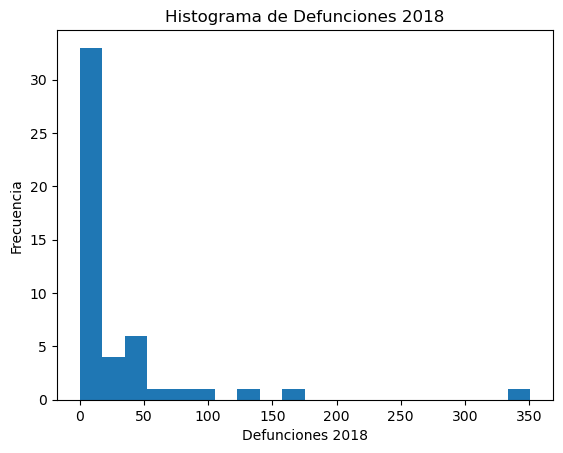

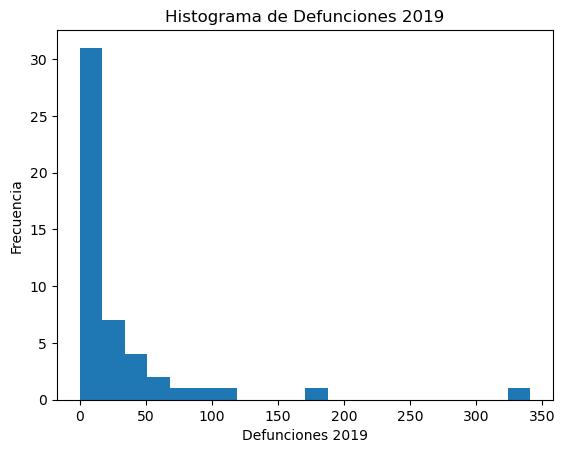

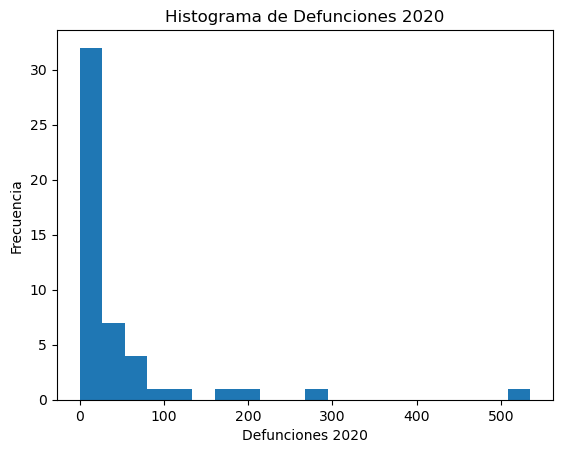

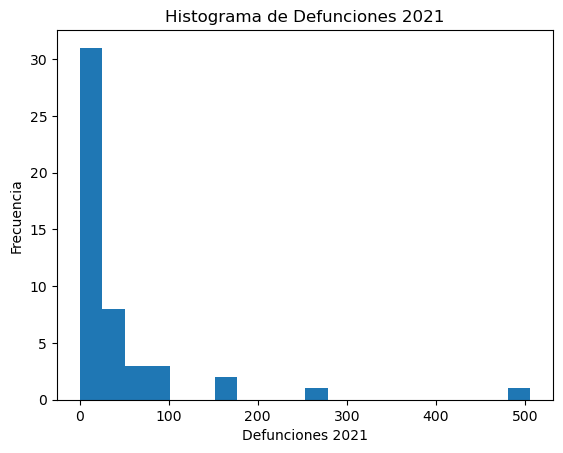

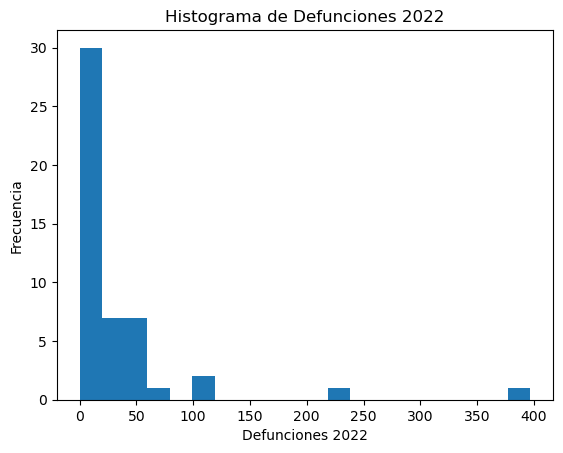

In [33]:
# Histograma para visualizar la distribución defunciones varones ultimos años del data set
columnas_a_visualizar_varones = ['Defunciones 2018', 'Defunciones 2019', 'Defunciones 2020', 'Defunciones 2021', 'Defunciones 2022']

for columna in columnas_a_visualizar_varones:
    plt.hist(df_varones[columna], bins=20) 
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

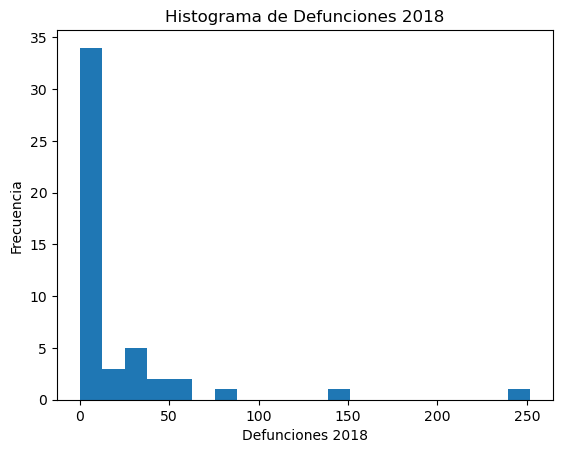

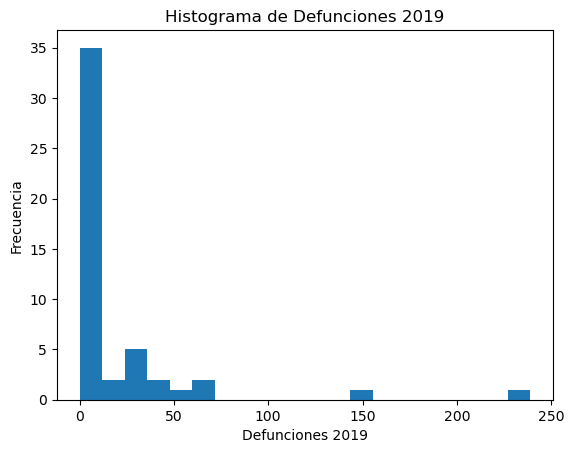

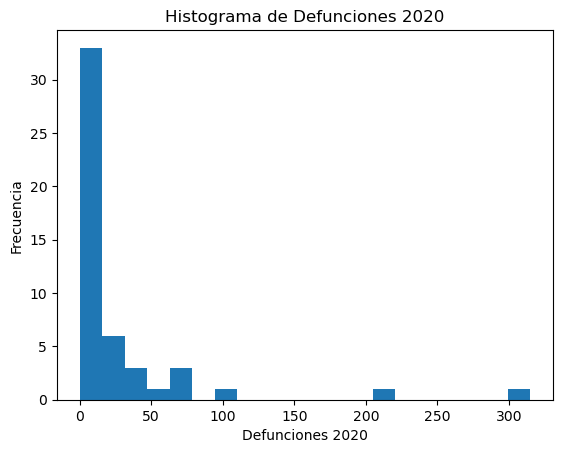

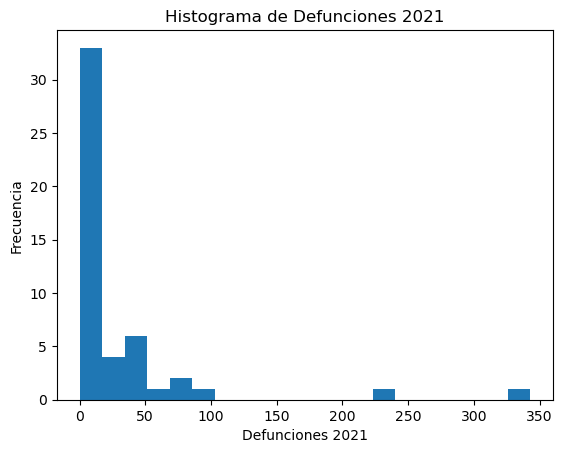

KeyError: 'Defunciones 2022'

In [35]:
# Histograma para visualizar la distribución defunciones mujeres ultimos años del data set
columnas_a_visualizar_mujeres = ['Defunciones 2018', 'Defunciones 2019', 'Defunciones 2020', 'Defunciones 2021', 'Defunciones 2022']

for columna in columnas_a_visualizar_mujeres:
    plt.hist(df_mujeres[columna], bins=20) 
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
#Diagrama de Dispersión ultimos años del data set

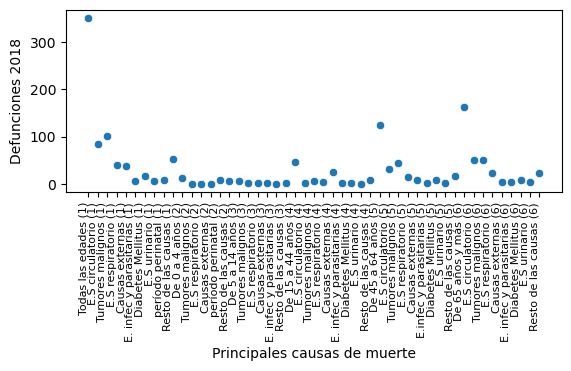

In [37]:
sns.scatterplot(data=df_varones, x='Principales causas de muerte', y='Defunciones 2018')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

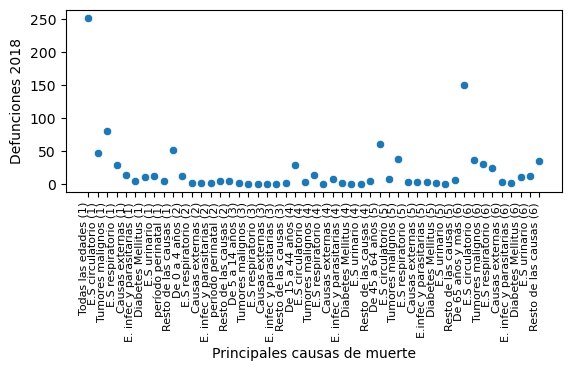

In [39]:
sns.scatterplot(data=df_mujeres, x='Principales causas de muerte', y='Defunciones 2018')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

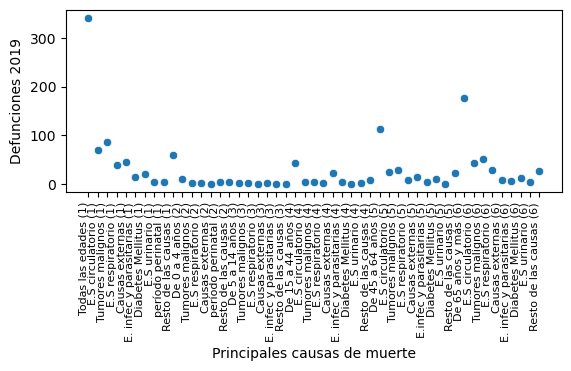

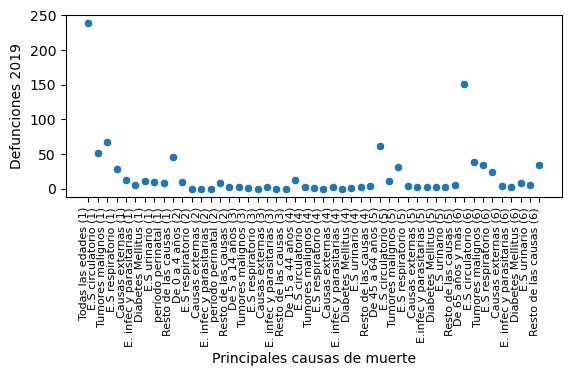

In [41]:
#Defunciones de hombres y mujeres 2019
sns.scatterplot(data=df_varones, x='Principales causas de muerte', y='Defunciones 2019')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

sns.scatterplot(data=df_mujeres, x='Principales causas de muerte', y='Defunciones 2019')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

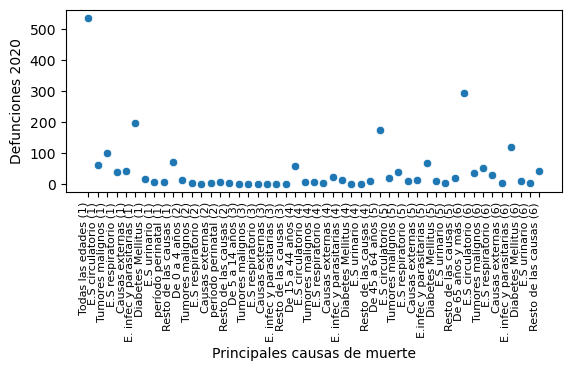

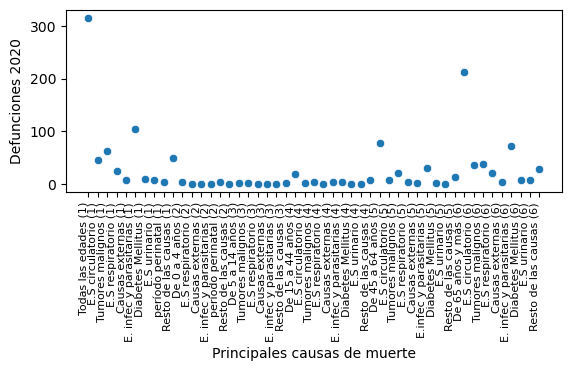

In [43]:
#Defunciones de hombres y mujeres 2020
sns.scatterplot(data=df_varones, x='Principales causas de muerte', y='Defunciones 2020')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

sns.scatterplot(data=df_mujeres, x='Principales causas de muerte', y='Defunciones 2020')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

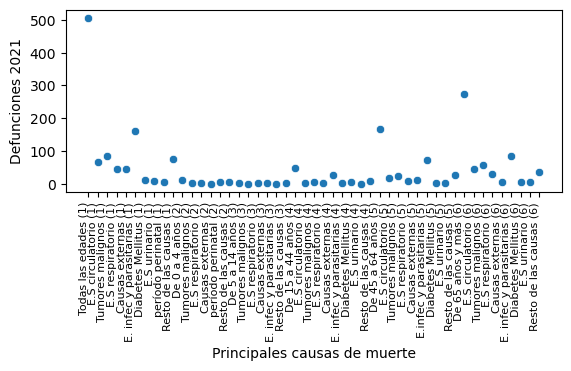

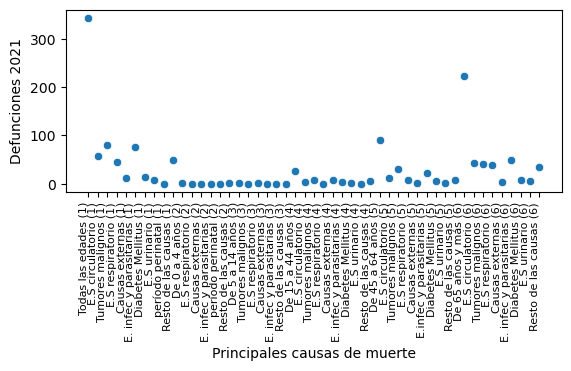

In [45]:
#Defunciones de hombres y mujeres 2021
sns.scatterplot(data=df_varones, x='Principales causas de muerte', y='Defunciones 2021')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

sns.scatterplot(data=df_mujeres, x='Principales causas de muerte', y='Defunciones 2021')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

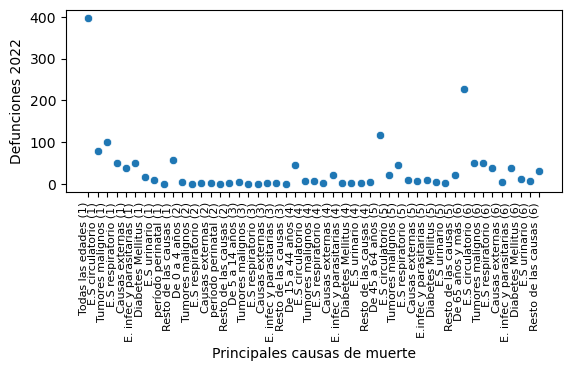

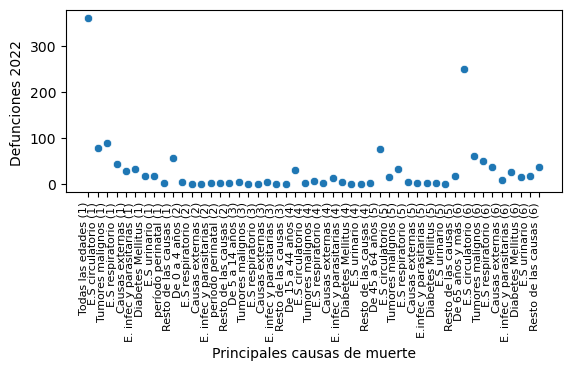

In [47]:
#Defunciones de hombres y mujeres 2022
sns.scatterplot(data=df_varones, x='Principales causas de muerte', y='Defunciones 2022')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

sns.scatterplot(data=df_mujeres, x='Principales causas de muerte', y='Defunciones 2022 ')
plt.xticks(rotation=90, ha='right')  
plt.subplots_adjust(bottom=0.5)
plt.xticks(fontsize=8)
plt.show()

In [ ]:
#Modelo Samira 

In [49]:
print(df_varones.columns)

Index(['Principales causas de muerte', 'Defunciones 2005', 'Defunciones 2006',
       'Defunciones 2007', 'Defunciones 2008', 'Defunciones 2009',
       'Defunciones 2010', 'Defunciones 2011', 'Defunciones 2012',
       'Defunciones 2013', 'Defunciones 2014', 'Defunciones 2015',
       'Defunciones 2016', 'Defunciones 2017', 'Defunciones 2018',
       'Defunciones 2019', 'Defunciones 2020', 'Defunciones 2021',
       'Defunciones 2022'],
      dtype='object')


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [53]:
#Modelo aprendizaje automatico df_varones

In [57]:
# One-hot encoding para las causas de muerte
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_causes = encoder.fit_transform(df_varones[['Principales causas de muerte']]).toarray()
df_varones = pd.concat([df_varones, pd.DataFrame(encoded_causes, columns=encoder.get_feature_names_out())], axis=1)

encoder = OneHotEncoder()
encoded_causes = encoder.fit_transform(df_mujeres[['Principales causas de muerte']]).toarray()
df_mujeres = pd.concat([df_mujeres, pd.DataFrame(encoded_causes, columns=encoder.get_feature_names_out())], axis=1)

In [59]:
# Dividir los datos en entrenamiento y prueba
#X = df_varones.drop(['Defunciones 2005','Defunciones 2006', 'Defunciones 2007','Defunciones 2008','Defunciones 2009' ,'Defunciones 2010'], axis=1)  # Características
#y = df_varones[['Principales causas de muerte']]  # Etiquetas
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = df_varones.drop(['Principales causas de muerte'], axis=1)  # Características
y = df_varones[['Defunciones 2005','Defunciones 2006', 'Defunciones 2007','Defunciones 2008','Defunciones 2009' ,'Defunciones 2010']]  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que tienes tus datos preparados

# Crea un clasificador multietiqueta
clf = MultiOutputClassifier(RandomForestClassifier())

# Ajusta el modelo a los datos
clf.fit(X_train, y_train)

# Realiza predicciones
y_pred = clf.predict(X_test)

In [62]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier  

model = RandomForestRegressor()  
model.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = model.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)

MSE: 32.000930000000004
R2: 0.9098306637209705


In [ ]:
#Modelo aprendizaje automatico df_mujeres

In [69]:
X = df_mujeres.drop(['Principales causas de muerte'], axis=1)  # Características
y = df_mujeres[['Defunciones 2005','Defunciones 2006', 'Defunciones 2007','Defunciones 2008','Defunciones 2009' ,'Defunciones 2010']]  # Etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()  
model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)

MSE: 3.699306666666667
R2: 0.609153105712223


In [ ]:
#Arboles de decision 

In [75]:
#Boxplot data_varones

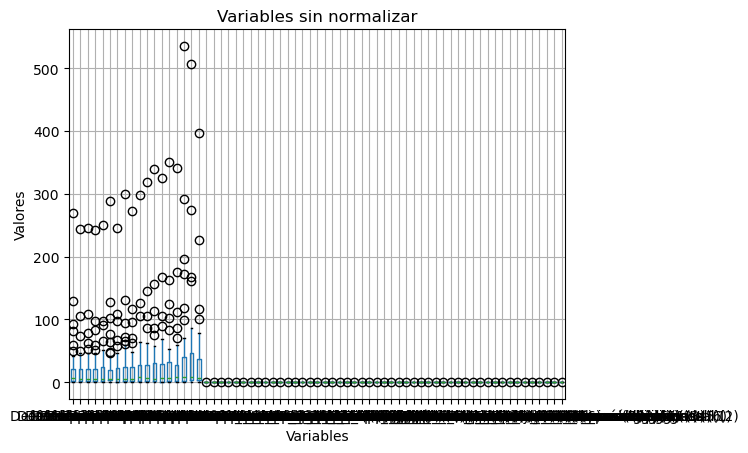

In [73]:
df_varones.iloc[:, 1:].boxplot()
plt.title('Variables sin normalizar')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

In [ ]:
Boxplot data mujeres

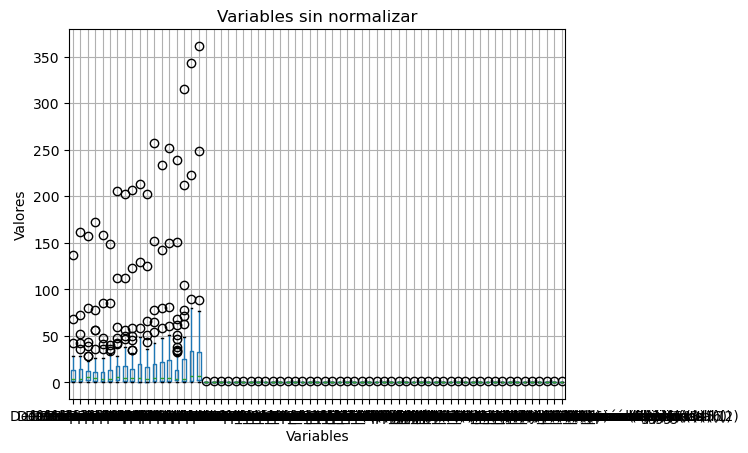

In [77]:
df_mujeres.iloc[:, 1:].boxplot()
plt.title('Variables sin normalizar')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

In [ ]:
Normalizando datos df_varones

In [79]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

cols_to_normalize = df_varones.columns[1:18]

# Aplica la función de normalización a las columnas seleccionadas
df_varones[cols_to_normalize] = df_varones[cols_to_normalize].apply(normalize)

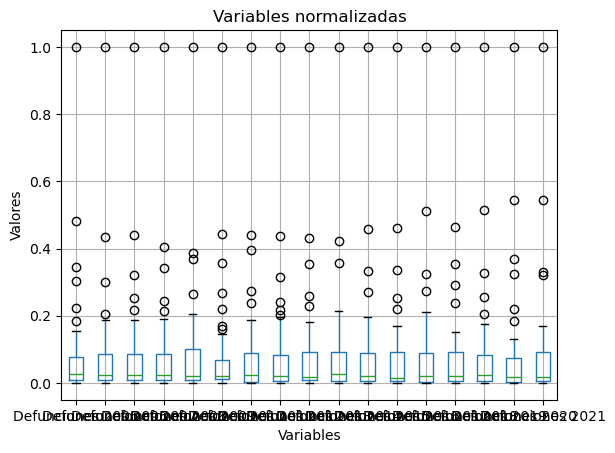

In [81]:
df_varones.iloc[:, 1:18].boxplot()
plt.title('Variables normalizadas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

In [ ]:
Normalizando datos df_mujeres

In [83]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

cols_to_normalize = df_mujeres.columns[1:18]

# Aplica la función de normalización a las columnas seleccionadas
df_mujeres[cols_to_normalize] = df_mujeres[cols_to_normalize].apply(normalize)

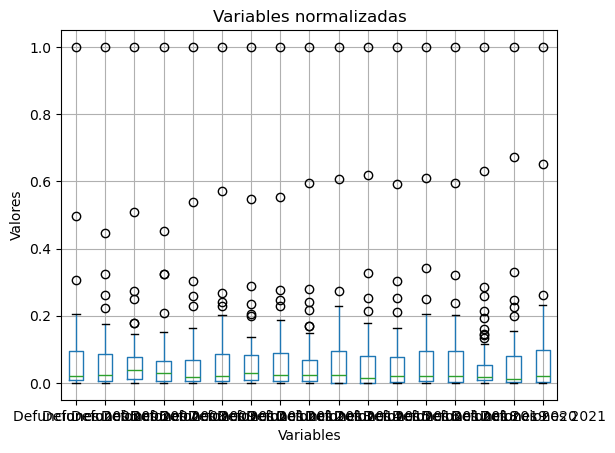

In [85]:
df_mujeres.iloc[:, 1:18].boxplot()
plt.title('Variables normalizadas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Para clasificación
from sklearn.tree import DecisionTreeRegressor  # Para regresión
from sklearn.metrics import accuracy_score  # Para evaluar la precisión (clasificación)
from sklearn.metrics import mean_squared_error  # Para evaluar el error (regresión)


#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_varones.drop('Principales causas de muerte', axis=1)  # Características
y = df_varones[['Defunciones 2005','Defunciones 2006','Defunciones 2007','Defunciones 2008']]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Crear y entrenar el modelo 

In [129]:
# Para regresion
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [131]:
y_pred = reg.predict(X_test)  # Para regresión

In [133]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.0018816005165489735


In [135]:
X = df_varones.drop('Principales causas de muerte', axis=1)  # Características
y = df_varones[['Defunciones 2005','Defunciones 2006','Defunciones 2007','Defunciones 2008','Defunciones 2009','Defunciones 2010','Defunciones 2011','Defunciones 2012','Defunciones 2013','Defunciones 2014','Defunciones 2015','Defunciones 2016','Defunciones 2017','Defunciones 2018','Defunciones 2019','Defunciones 2020','Defunciones 2021','Defunciones 2022']]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [139]:
y_pred = reg.predict(X_test)  # Para regresión
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 7.64693247307234


In [ ]:
#Modelo arobol de decision para df_mujeres

In [141]:
X = df_mujeres.drop('Principales causas de muerte', axis=1)  # Características
y = df_mujeres[['Defunciones 2005','Defunciones 2006','Defunciones 2007','Defunciones 2008']]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)  # Para regresión
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.001404642857559316


In [143]:
X = df_mujeres.drop('Principales causas de muerte', axis=1)  # Características
y = df_mujeres[['Defunciones 2005','Defunciones 2006','Defunciones 2007','Defunciones 2008','Defunciones 2009','Defunciones 2010','Defunciones 2011','Defunciones 2012','Defunciones 2013','Defunciones 2014','Defunciones 2015','Defunciones 2016','Defunciones 2017','Defunciones 2018','Defunciones 2019','Defunciones 2020','Defunciones 2021','Defunciones 2022 ']]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)  # Para regresión
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 1.0840786449346773


In [105]:
#mejorando el modelo

In [145]:
X = df_mujeres.drop('Principales causas de muerte', axis=1)  # Características
y = df_mujeres[['Defunciones 2005','Defunciones 2006','Defunciones 2007','Defunciones 2008']]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)  # Para regresión
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.001335770093749925


In [147]:
print(X_test)


    Defunciones 2005  Defunciones 2006  Defunciones 2007  Defunciones 2008  \
13          0.000000          0.000000          0.000000          0.000000   
45          0.007299          0.018634          0.044586          0.017442   
47          0.007299          0.006211          0.038217          0.023256   
44          0.007299          0.012422          0.012739          0.005814   
17          0.007299          0.006211          0.000000          0.000000   
27          0.014599          0.018634          0.000000          0.005814   
26          0.072993          0.043478          0.019108          0.046512   
25          0.007299          0.006211          0.012739          0.017442   
31          0.204380          0.322981          0.248408          0.325581   
19          0.021898          0.006211          0.012739          0.005814   

    Defunciones 2009  Defunciones 2010  Defunciones 2011  Defunciones 2012  \
13          0.000000          0.000000          0.000000       

In [161]:

# Crear un DataFrame con los nuevos datos
nuevos_datos = pd.DataFrame(np.random.rand(10, 67)) #columns=[['Columna1', 'Columna2', 'Columna3', 'Columna4', 'Columna5','Columna6','Columna7','Columna8','Columna9','Columna10','Columna11','Columna12','Columna13','Columna14','Columna15','Columna16','Columna17','Columna18','Columna19','Columna20','Columna21','Columna22','Columna23','Columna24','Columna25','Columna26','Columna26','Columna27','Columna28','Columna29','Columna30','Columna31','Columna32','Columna33','Columna34','Columna35','Columna36','Columna37','Columna38','Columna39','Columna40','Columna41','Columna42','Columna43','Columna44','Columna45','Columna46','Columna47','Columna48','Columna49','Columna50','Columna51','Columna52','Columna53','Columna54','Columna55','Columna56','Columna57','Columna58','Columna59','Columna60','Columna61','Columna62','Columna63','Columna64','Columna65','Columna66']])

print(nuevos_datos)

         0         1         2         3         4         5         6   \
0  0.899422  0.331191  0.834960  0.170894  0.766482  0.636835  0.752578   
1  0.799737  0.747269  0.215962  0.932362  0.038093  0.504202  0.487916   
2  0.418891  0.812295  0.847430  0.556682  0.226885  0.424056  0.521831   
3  0.716749  0.780178  0.759065  0.553833  0.823528  0.982429  0.234957   
4  0.771460  0.352610  0.170866  0.719865  0.851363  0.951846  0.471155   
5  0.349573  0.035442  0.994528  0.191478  0.840283  0.647727  0.439116   
6  0.345703  0.961804  0.963053  0.142136  0.143823  0.703451  0.348824   
7  0.029886  0.778223  0.500735  0.442265  0.370503  0.680702  0.558988   
8  0.466868  0.237765  0.578210  0.704092  0.781342  0.486017  0.210245   
9  0.469619  0.861018  0.508731  0.150916  0.830358  0.227389  0.268636   

         7         8         9   ...        57        58        59        60  \
0  0.333620  0.215340  0.229094  ...  0.918971  0.753279  0.114309  0.729513   
1  0.269801  0